<a href="https://colab.research.google.com/github/ammshreya/InternalProject-CreditCardFraud/blob/main/Dataset2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading te dataset
credit_card_data = pd.read_csv('creditcard.csv')


In [ ]:
#to get the firat 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43659,41598,-0.538686,-0.635328,-0.041569,-3.022158,0.771776,3.556774,-1.418820,1.371999,-2.475053,...,-0.090409,-0.310254,0.168510,0.955413,-0.427495,-0.375891,0.051010,0.072416,60.01,0.0
43660,41599,-0.349615,-2.860571,0.297766,0.801212,-1.523995,1.164260,0.037484,0.325220,0.862825,...,0.315370,-0.503099,-0.514747,-0.193890,-0.327091,0.875820,-0.144908,0.125368,745.56,0.0
43661,41599,-3.001222,2.899766,0.726874,-0.729992,-0.312792,-0.735557,0.960944,-0.276141,2.128747,...,-0.645540,-0.613956,0.111663,0.338567,0.268357,0.076981,1.184716,0.491066,8.99,0.0
43662,41599,1.042342,-0.390001,-0.463680,-1.737393,0.450611,0.604354,0.068099,0.278030,0.555053,...,-0.137137,-0.286887,0.143336,-0.986810,0.135599,-0.185344,0.035590,-0.008304,48.00,0.0
43663,41600,1.193909,0.067328,0.609239,0.825453,-0.332038,-0.101522,-0.130782,-0.033697,0.424588,...,-0.049950,0.213908,-0.068750,0.182281,0.557841,0.400000,NaN,NaN,NaN,NaN


In [ ]:
#to get the information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43664 entries, 0 to 43663
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    43664 non-null  int64  
 1   V1      43664 non-null  float64
 2   V2      43664 non-null  float64
 3   V3      43664 non-null  float64
 4   V4      43664 non-null  float64
 5   V5      43664 non-null  float64
 6   V6      43664 non-null  float64
 7   V7      43664 non-null  float64
 8   V8      43664 non-null  float64
 9   V9      43664 non-null  float64
 10  V10     43664 non-null  float64
 11  V11     43664 non-null  float64
 12  V12     43664 non-null  float64
 13  V13     43664 non-null  float64
 14  V14     43664 non-null  float64
 15  V15     43664 non-null  float64
 16  V16     43664 non-null  float64
 17  V17     43664 non-null  float64
 18  V18     43664 non-null  float64
 19  V19     43664 non-null  float64
 20  V20     43664 non-null  float64
 21  V21     43664 non-null  float64
 22

In [ ]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

0.0    43529
1.0      134
Name: Class, dtype: int64

In [ ]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [ ]:
print(legit.shape)
print(fraud.shape)

(43529, 31)
(134, 31)


In [ ]:
legit.Amount.describe()

count    43529.000000
mean        90.302800
std        238.465356
min          0.000000
25%          7.580000
50%         24.900000
75%         81.400000
max       7879.420000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     134.000000
mean       93.928433
std       231.551248
min         0.000000
25%         1.000000
50%         6.455000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,26892.929610,-0.210136,0.014404,0.735522,0.173494,-0.226584,0.106817,-0.092752,0.039222,0.185126,...,0.046501,-0.029740,-0.109589,-0.039132,0.010036,0.135999,0.022175,0.004776,0.004927,90.302800
1.0,25259.246269,-7.759814,5.619386,-10.672832,6.111351,-5.776140,-2.360976,-8.192938,4.040000,-3.571525,...,0.507150,0.931331,-0.270332,-0.315606,-0.096976,0.279383,0.168436,0.687503,0.063472,93.928433


In [ ]:
legit_sample = legit.sample(n=85)

In [ ]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)

In [ ]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
11351,19780,1.288024,-0.295505,0.688362,-0.709518,-0.740265,-0.294616,-0.671149,-0.060929,3.167726,...,-0.211844,-0.135007,-0.136811,-0.492933,0.583957,-0.674169,0.063544,0.022187,11.85,0.0
29073,35305,1.118293,0.378724,0.973333,2.578004,-0.339706,0.115367,-0.176331,0.167139,-0.477814,...,-0.245432,-0.643784,0.081432,0.286211,0.333267,-0.195148,0.003361,0.014787,0.76,0.0
40377,40214,1.179316,-1.017096,0.558859,-1.518470,-1.412426,-0.576387,-0.731612,-0.023081,0.404890,...,-0.334346,-0.535203,0.056409,0.030736,0.215655,-0.759649,0.100917,0.049894,84.99,0.0
3349,2899,1.167954,0.125881,0.879225,0.786664,-0.869120,-1.111867,-0.079887,-0.243691,0.073567,...,0.201747,0.641861,-0.059488,1.002315,0.426409,0.449189,-0.014699,0.027996,26.00,0.0
22791,32433,-0.419916,-0.275134,0.700811,-2.331038,-0.286157,0.427370,1.613619,-0.431611,0.926464,...,-0.028267,0.176178,-0.161022,-0.822224,0.041274,-0.091614,-0.397972,-0.480752,213.96,0.0


In [ ]:
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43061,41353,-15.020981,8.075240,-16.298091,5.664820,-11.918153,-4.246957,-14.716668,9.435084,-6.795398,...,2.525115,-0.832074,-0.186117,0.429781,0.697103,0.056031,-1.310888,-0.707403,34.12,1.0
43160,41397,-14.970346,8.401421,-16.867238,8.252334,-13.565130,-2.782438,-14.263735,9.643419,-7.701499,...,2.714045,-0.101355,-0.439666,0.519514,0.789328,0.064357,-1.621386,-1.104819,273.01,1.0
43204,41413,-15.140450,7.378042,-16.356367,9.194935,-13.466163,-2.958431,-16.165539,10.075254,-7.901821,...,3.147428,0.341678,-1.150162,0.795190,-0.194542,0.145964,-2.458680,-1.189888,106.55,1.0
43428,41505,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1.0
43624,41582,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,-1.140208,...,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,39.45,1.0


In [ ]:
new_dataset['Class'].value_counts()

1.0    134
0.0     85
Name: Class, dtype: int64

In [ ]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,26466.152941,-0.010358,0.139143,0.829161,0.179111,-0.07553,0.298248,-0.073544,-0.050924,0.307417,...,0.049047,-0.144844,-0.077391,-0.039813,0.045265,0.106134,-0.036137,-0.075372,-0.038692,60.721059
1.0,25259.246269,-7.759814,5.619386,-10.672832,6.111351,-5.77614,-2.360976,-8.192938,4.040000,-3.571525,...,0.507150,0.931331,-0.270332,-0.315606,-0.096976,0.279383,0.168436,0.687503,0.063472,93.928433


In [ ]:
X=new_dataset.drop(columns='Class',axis=1)
Y=new_dataset['Class']

In [ ]:
print(X)

        Time         V1        V2         V3        V4         V5        V6  \
11351  19780   1.288024 -0.295505   0.688362 -0.709518  -0.740265 -0.294616   
29073  35305   1.118293  0.378724   0.973333  2.578004  -0.339706  0.115367   
40377  40214   1.179316 -1.017096   0.558859 -1.518470  -1.412426 -0.576387   
3349    2899   1.167954  0.125881   0.879225  0.786664  -0.869120 -1.111867   
22791  32433  -0.419916 -0.275134   0.700811 -2.331038  -0.286157  0.427370   
...      ...        ...       ...        ...       ...        ...       ...   
43061  41353 -15.020981  8.075240 -16.298091  5.664820 -11.918153 -4.246957   
43160  41397 -14.970346  8.401421 -16.867238  8.252334 -13.565130 -2.782438   
43204  41413 -15.140450  7.378042 -16.356367  9.194935 -13.466163 -2.958431   
43428  41505 -16.526507  8.584972 -18.649853  9.505594 -13.793819 -2.832404   
43624  41582  -1.048005  1.300219  -0.180401  2.589843  -1.164794  0.031823   

              V7         V8        V9  ...       V2

In [ ]:
print(Y)

11351    0.0
29073    0.0
40377    0.0
3349     0.0
22791    0.0
        ... 
43061    1.0
43160    1.0
43204    1.0
43428    1.0
43624    1.0
Name: Class, Length: 219, dtype: float64


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

(219, 30) (175, 30) (44, 30)


In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9771428571428571


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9545454545454546


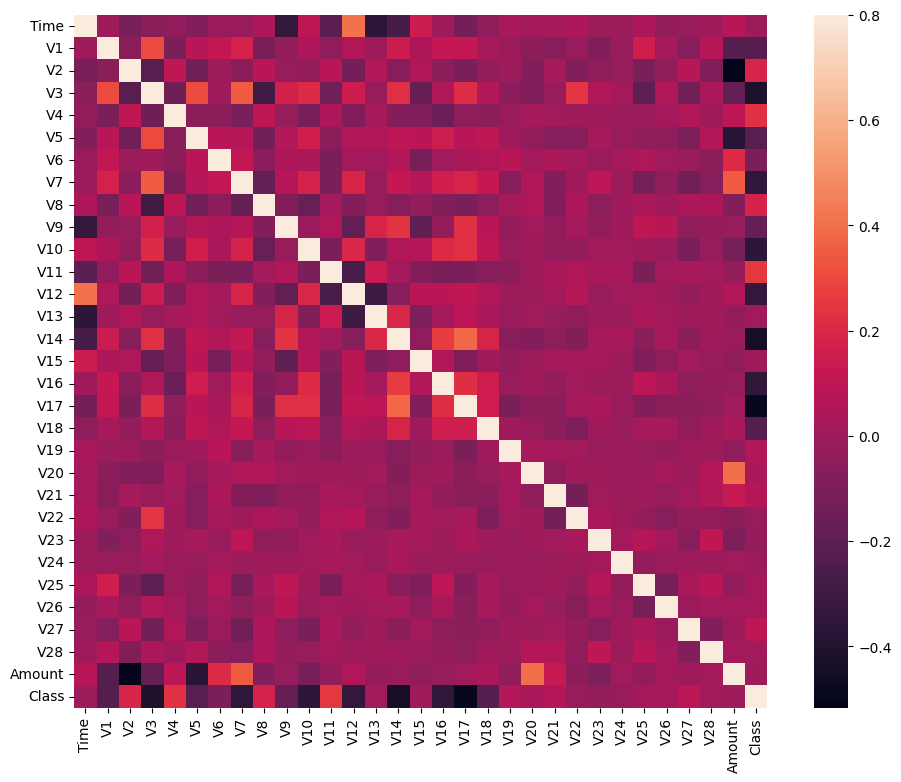

In [ ]:
corrmat = credit_card_data.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

data distribution graphs to help us understand where our data came from

<ipython-input-94-c88bf3a71f30>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data.iloc[:, i], ax=ax, fit=norm,
<ipython-input-94-c88bf3a71f30>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(credit_card_data.iloc[:, i], ax=ax, fit=norm,
<ipython-input-94-c88bf3a71f30>:10: User

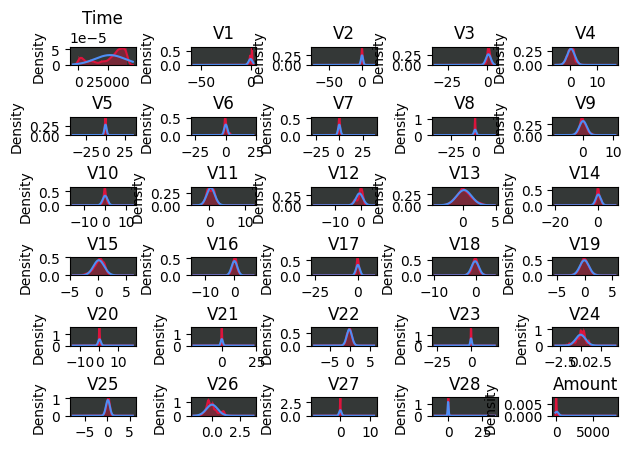

In [ ]:
from scipy.stats import norm
fig, axs = plt.subplots(6, 5, squeeze=False)

for i, ax in enumerate(axs.flatten()):

   ax.set_facecolor('xkcd:charcoal')

   ax.set_title(credit_card_data.columns[i])

   sns.distplot(credit_card_data.iloc[:, i], ax=ax, fit=norm,

                color="#DC143C", fit_kws={"color": "#4e8ef5"})

   ax.set_xlabel(" ")

fig.tight_layout(h_pad=-1.0, w_pad=-1.0)

plt.show()